# Part 1: Data Cleaning

<font color='483D8B'><b> Let's start with getting the datafiles rounds.csv and companies.txt. </font></b>

In [62]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# reading data files
# using encoding = "ISO-8859-1" to avoid pandas encoding error
rounds = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")
companies = pd.read_csv("companies.txt", sep="\t", encoding = "ISO-8859-1")


In [63]:
# Look at rounds head
print(rounds.head())

                     company_permalink  \
0                  /organization/-fame   
1               /ORGANIZATION/-QOUNTER   
2               /organization/-qounter   
3  /ORGANIZATION/-THE-ONE-OF-THEM-INC-   
4                /organization/0-6-com   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
2  /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
3  /funding-round/650b8f704416801069bb178a1418776b            venture   
4  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   

  funding_round_code   funded_at  raised_amount_usd  
0                  B  05-01-2015         10000000.0  
1                  A  14-10-2014                NaN  
2                NaN  01-03-2014           700000.0  
3                  B  30-01-2014          3406878.0  
4                  A  19-03-2008      

In [64]:
# inspect the structure etc.
print(rounds.info(), "\n")
print(rounds.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB
None 

(114949, 6)


 <font color='483D8B'><b> The variables funding_round_code and raised_amount_usd contain some missing values, as shown above. We'll deal with them after we're done with understanding the data - column names, primary keys of tables etc.</font></b>

In [65]:
# look at companies head
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [66]:
# companies structure
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


<font color='483D8B'><b> Ideally, the ```permalink``` column in the companies dataframe should be the unique_key of the table, having 66368 unique company names (links, or permalinks). Also, these 66368 companies should be present in the rounds file.

Let's first confirm that these 66368 permalinks (which are the URL paths of companies' websites) are not repeating in the column, i.e. they are unique. </font></b>

In [67]:
# identify the unique number of permalinks in companies
len(companies.permalink.unique())

66368

<font color='483D8B'><b> Also, let's convert all the entries to lowercase (or uppercase) for uniformity.</font></b>

In [68]:
# converting all permalinks to lowercase
companies['permalink'] = companies['permalink'].str.lower()
companies.head()


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [69]:
# look at unique values again
len(companies.permalink.unique())

66368

<font color='483D8B'><b>Thus, there are 66368 unique companies in the table and ```permalink``` is the unique primary key. Each row represents a unique company.

Let's now check whether all of these 66368 companies are present in the rounds file, and if some extra ones are present.</font></b>

In [70]:
# look at unique company names in rounds df
# note that the column name in rounds file is different (company_permalink)
len(rounds.company_permalink.unique())


90247

<font color='483D8B'><b>There seem to be 90247 unique values of ```company_permalink```, whereas we expected only 66368. May be this is because of uppercase/lowercase issues.

Let's convert the column to lowercase and look at unique values again.</font><b>

In [71]:
# converting column to lowercase
rounds['company_permalink'] = rounds['company_permalink'].str.lower()
rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [72]:
# Look at unique values again
len(rounds.company_permalink.unique())

66370

<font color='483D8B'><b>There seem to be 2 extra permalinks in the rounds file which are not present in the companies file. Let's hope that this is a data quality issue, since if this were genuine, we have two companies whose investment round details are available but their metadata (company name, sector etc.) is not available in the companies table.

<font color='483D8B'><b>Let's have a look at the company permalinks which are in the 'rounds' file but not in 'companies'.</font></b>

In [73]:
# companies present in rounds file but not in (~) companies file
rounds.loc[~rounds['company_permalink'].isin(companies['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
729,/organization/51wofang-æ å¿§ææ¿,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,A,06-07-2015,5000000.0
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
54751,/organization/lawpã dã­,/funding-round/56a8ba75784c0028e2eacd0c0e205119,grant,NaN,23-03-2015,5000.0
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


<font color='483D8B'><b>All the permalinks have weird non-English characters. Let's see whether these characters are present in the original df as well. </font></b>

In [74]:
# looking at the indices with weird characters
rounds_original = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")
rounds_original.iloc[[29597, 31863, 45176, 58473], :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/ORGANIZATION/E-CÃBICA,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/ORGANIZATION/ENERGYSTONE-GAMES-ÇµÇ³Æ¸¸Æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/ORGANIZATION/MAGNET-TECH-Ç£Ç³Ç§Æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0


<font color='483D8B'><b>The company weird characters appear when you import the data file. To confirm whether these characters are actually present in the given data or whether python has introduced them while importing into pandas, let's have a look at the original CSV file in Excel.

The figure below shows the filtered rows - they have the usual English characters.</font></b>

<img src= "./weird_names.PNG" >

<font color='483D8B'><b> Thus, this is most likely a data quality issue we have introduced while reading the data file into python. Specifically, this is most likely caused because of encoding.

First, let's try to figure out the encoding type of this file. Then we can try specifying the encoding type at the time of reading the file. The ```chardet``` library shows the encoding type of a file. </font></b>

In [75]:
# import chardet

# rawdata = open('rounds2.csv', 'rb').read()
# result = chardet.detect(rawdata)
# charenc = result['encoding']
# print(charenc)

In [76]:
# print(result)

<font color='483D8B'><b>Now let's try telling pandas (at the time of importing) the encoding type. Here's a list of various encoding types python can handle:</font></b> https://docs.python.org/2/library/codecs.html#standard-encodings.

In [77]:
# trying different encodings
# encoding="cp1254" throws an error
# rounds_original = pd.read_csv("rounds2.csv", encoding="cp1254")
# rounds_original.iloc[[29597, 31863, 45176], :]

<font color='483D8B'><b>Apparently, pandas cannot decode "cp1254" in this case. After searching a lot on stackoverflow and Google, the best conclusion that can be drawn is that this file is encoded using multiple encoding types (may be because the ```company_permalink``` column contains names of companies in various countries, and hence various languages).

After trying various other encoding types (in vain), this answer suggested an alternate (and a more intelligent) way: </font></b>https://stackoverflow.com/questions/45871731/removing-special-characters-in-a-pandas-dataframe.



In [78]:
rounds['company_permalink'] = rounds.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
rounds.loc[~rounds['company_permalink'].isin(companies['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
77,/organization/10north,/funding-round/b41ff7de932f8b6e5bbeed3966c0ed6a,equity_crowdfunding,NaN,12-08-2014,NaN
729,/organization/51wofang-,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,A,06-07-2015,5000000.0
2670,/organization/adslinked,/funding-round/449ae54bb63c768c232955ca6911dee4,seed,NaN,29-09-2014,100000.0
3166,/organization/aesthetic-everything-social-network,/funding-round/62593455f1a69857ed05d5734cc04132,equity_crowdfunding,NaN,12-10-2014,NaN
3291,/organization/affluent-attach-club-2,/funding-round/626678bdf1654bc4df9b1b34647a4df1,seed,NaN,15-10-2014,100000.0
4568,/organization/allgu-outlet,/funding-round/49e8a9b54ed19c8505ca92dc031a8e9c,venture,NaN,17-03-2015,1400000.0
8097,/organization/asiansbook,/funding-round/3f243ab92b4fe397d41b4734a17ca5f0,seed,NaN,15-09-2014,100000.0
8652,/organization/atlye-gri,/funding-round/75bdeacd95a647108aa4bc480e77894d,grant,NaN,01-11-2012,13940.0
9784,/organization/axgaz,/funding-round/511a41181aaf193bbd419babfb8d66e9,venture,NaN,06-07-2015,4094392.0
14311,/organization/boral-bikes-incorporated,/funding-round/be79575bf4b5b5d6fa64670800a3ca5e,seed,NaN,26-02-2015,NaN


<font color='483D8B'><b>This seems to work fine. 

Let's now look at the number of unique values in rounds dataframe again.</font></b>

In [79]:
# Look at unique values again
len(rounds.company_permalink.unique())

66368

<font color='483D8B'><b>Now it makes sense - there are 66368 unique companies in both the ```rounds``` and ```companies``` dataframes. 

It is possible that a similar encoding problems are present in the companies file as well. Let's look at the companies which are present in the companies file but not in the rounds file - if these have special characters, then it is most likely because the ```companies``` file is encoded (while rounds is not).</font></b>

In [80]:
# companies present in companies df but not in rounds df
companies.loc[~companies['permalink'].isin(rounds['company_permalink']), :]


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
43,/organization/10â°north,10Â°North,NaN,Fashion,operating,CAN,ON,Toronto,Mississauga,05-01-2013
426,/organization/51wofang-æ å¿§ææ¿,51wofang æ å¿§ææ¿,http://www.51wofang.com,NaN,closed,NaN,NaN,NaN,NaN,01-01-2014
1506,/organization/adslinkedâ¢,AdsLinkedâ¢,http://www.adslinked.com,Advertising|Internet,operating,NaN,NaN,NaN,NaN,NaN
1775,/organization/aesthetic-everythingâ®-social-ne...,Aesthetic EverythingÂ® Social Network,http://aestheticeverything.com/,Public Relations,operating,USA,CA,Los Angeles,Marina Del Rey,15-06-2009
1834,/organization/affluent-attachã©-club-2,Affluent AttachÃ© Club,http://www.affluentattache.com/,Hospitality,operating,USA,CA,Los Angeles,Beverly Hills,NaN
2556,/organization/allgã¤u-outlet,AllgÃ¤u Outlet,http://allgaeuoutlet.de/,Fashion,operating,DEU,2,DEU - Other,Sonthofen,NaN
4567,/organization/asiansbookâ¢,Asiansbookâ¢,http://www.asiansbook.com,Social Media|Social Network Media,operating,NaN,NaN,NaN,NaN,NaN
4903,/organization/atã¶lye-gri,AtÃ¶lye Gri,http://www.atolyegri.com/,Advertising,operating,NaN,NaN,NaN,NaN,NaN
5490,/organization/axã¨gaz,AxÃ¨gaz,http://www.axegaz.com/,Energy,operating,FRA,A8,Paris,Levallois-perret,01-01-2012
8131,/organization/borã©al-bikes-incorporated,BorÃ©al Bikes Incorporated,http://www.borealbikes.com,Automotive|Design|Manufacturing,operating,DEU,16,Berlin,Berlin,01-01-2014


<font color='483D8B'><b>Thus, the ```companies``` df also contains special characters. Let's treat those as well.</font></b>

In [81]:
# remove encoding from companies df
companies['permalink'] = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')


<font color='483D8B'><b>Let's now look at the companies present in the companies df but not in rounds df - ideally there should be none.</font></b>

In [82]:
# companies present in companies df but not in rounds df
companies.loc[~companies['permalink'].isin(rounds['company_permalink']), :]


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
426,/organization/51wofang-,51wofang æ å¿§ææ¿,http://www.51wofang.com,NaN,closed,NaN,NaN,NaN,NaN,01-01-2014
26139,/organization/huizuche-com-,Huizuche.com æ ç§è½¦,http://huizuche.com,NaN,closed,NaN,NaN,NaN,NaN,24-04-2014
31693,/organization/lawp d,LawPadi,http://lawpadi.com/,Advice|Internet|Legal,closed,NGA,5,Lagos,Lagos,01-07-2015


<font color='483D8B'><b>So there is still seems to be error.</font></b>  
<font color='483D8B'><b>Let's look at the companies present rounds df but not in companies df.</font></b>

In [83]:
rounds.loc[~rounds['company_permalink'].isin(companies['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
729,/organization/51wofang-,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,A,06-07-2015,5000000.0
45176,/organization/huizuche-com-,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
54751,/organization/lawpd,/funding-round/56a8ba75784c0028e2eacd0c0e205119,grant,NaN,23-03-2015,5000.0


#### <font color='483D8B'><b>Comparing the companies above we can see that the companies in both the df are same but due to space issue they are showing to be different.</font></b>
#### <font color='483D8B'><b>So lets now treat them.</font></b>

In [84]:
companies['permalink']=companies['permalink'].apply(lambda x : x.strip(" "))

In [85]:
# companies present in companies df but not in rounds df
companies.loc[~companies['permalink'].isin(rounds['company_permalink']), :]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
31693,/organization/lawp d,LawPadi,http://lawpadi.com/,Advice|Internet|Legal,closed,NGA,5,Lagos,Lagos,01-07-2015


In [86]:
companies.iloc[[31693],0]='/organization/lawpd'

In [87]:
# companies present in companies df but not in rounds df
companies.loc[~companies['permalink'].isin(rounds['company_permalink']), :]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


<font color='483D8B'><b>Thus, the encoding issue seems resolved now. Let's write these (clean) dataframes into separate files so we don't have to worry about encoding problems again.</font></b>

In [88]:
# write rounds file
rounds.to_csv("rounds_clean.csv", sep=',', index=False)

# write companies file
companies.to_csv("companies_clean.csv", sep='\t', index=False)

# Part 2: Data Cleaning - II

<font color='483D8B'><b>Now that we've treated the encoding problems (caused by special characters), let's complete the data cleaning process by treating missing values. 

We'll read the clean csv files we created in the previous exercise.</font></b>

In [89]:
# read the new, decoded csv files
rounds = pd.read_csv("rounds_clean.csv", encoding = "ISO-8859-1")
companies = pd.read_csv("companies_clean.csv", sep="\t", encoding = "ISO-8859-1")

In [90]:
# quickly verify that there are 66368 unique companies in both
# and that only the same 66368 are present in both files

# unqiue values
print(len(companies.permalink.unique()))
print(len(rounds.company_permalink.unique()))

# present in rounds but not in companies
print(len(rounds.loc[~rounds['company_permalink'].isin(companies['permalink']), :]))

66368
66368
0


## Missing Value Treatment

<font color='483D8B'><b>Let's now move to missing value treatment. 

Let's have a look at the number of missing values in both the dataframes.</font></b>

In [91]:
# missing values in companies df
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [92]:
# missing values in rounds df
rounds.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

<font color='483D8B'><b>Since there are no misisng values in the permalink or company_permalink columns, let's merge the two and then work on the master dataframe.</font></b>

In [93]:
# merging the two dfs
master = pd.merge(companies, rounds, how="inner", left_on="permalink", right_on="company_permalink")
master.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


<font color='483D8B'><b>Since the columns ```company_permalink``` and ```permalink``` are the same, let's remove one of them.</font></b>


In [94]:
# print column names
master.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [95]:
# removing redundant columns
master =  master.drop(['company_permalink'], axis=1) 

In [96]:
# look at columns after dropping
master.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'funding_round_permalink', 'funding_round_type', 'funding_round_code',
       'funded_at', 'raised_amount_usd'],
      dtype='object')

<font color='483D8B'><b>Let's now look at the number of missing values in the master df.</font></b>

In [97]:
# column-wise missing values 
master.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

<font color='483D8B'><b>Let's look at the fraction of missing values in the columns.</font></b>

In [98]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

<font color='483D8B'><b>Clearly, the column ```funding_round_code``` is useless (with about 73% missing values). Also, for the business objectives given, the columns ```homepage_url```, ```founded_at```, ```state_code```, ```region``` and ```city``` need not be used.

Thus, let's drop these columns.</font></b>

In [99]:
# dropping columns 
master = master.drop(['funding_round_code', 'homepage_url', 'founded_at', 'state_code', 'region', 'city'], axis=1)
master.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [100]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                   0.00
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

<font color='483D8B'><b>Note that the column ```raised_amount_usd``` is an important column, since that is the number we want to analyse (compare, means, sum etc.). That needs to be carefully treated. 

Also, the column ```country_code``` will be used for country-wise analysis, and ```category_list``` will be used to merge the dataframe with the main categories.

Let's first see how we can deal with missing values in ```raised_amount_usd```.</font></b>


In [101]:
# summary stats of raised_amount_usd
master['raised_amount_usd'].describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

<font color='483D8B'><b>The mean is somewhere around USD 10 million, while the median is only about USD 1m. The min and max values are also miles apart. 

In general, since there is a huge spread in the funding amounts, it will be inappropriate to impute it with a metric such as median or mean. Also, since we have quite a large number of observations, it is wiser to just drop the rows. 

Let's thus remove the rows having NaNs in ```raised_amount_usd```.</font></b>

In [102]:
# removing NaNs in raised_amount_usd
master = master[~np.isnan(master['raised_amount_usd'])]
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

<font color='483D8B'><b>Let's now look at the column ```country_code```. To see the distribution of the values for categorical variables, it is best to convert them into type 'category'.</font></b>

In [1]:
country_codes = master['country_code'].astype('category')

# displaying frequencies of each category
country_codes.value_counts().head()

NameError: name 'master' is not defined

<font color='483D8B'><b>By far, the most number of investments have happened in American countries. We can also see the fractions.</font></b>

In [104]:
# viewing fractions of counts of country_codes
100*(master['country_code'].value_counts()/len(master.index))

USA    65.342937
GBR     5.285439
CAN     2.754873
CHN     2.029297
IND     1.736539
FRA     1.528028
ISR     1.436409
ESP     1.131014
DEU     1.097316
AUS     0.683453
RUS     0.619215
IRL     0.592887
SWE     0.589728
SGP     0.574985
NLD     0.560242
JPN     0.510747
BRA     0.508641
ITA     0.508641
CHE     0.460199
CHL     0.454933
KOR     0.454933
FIN     0.402279
DNK     0.330669
ARG     0.312767
BEL     0.308554
HKG     0.263272
TUR     0.206405
NOR     0.201139
BGR     0.200086
MEX     0.199033
         ...    
DOM     0.002106
MCO     0.002106
ALB     0.002106
ZWE     0.002106
TUN     0.002106
KAZ     0.002106
KWT     0.002106
BAH     0.002106
ZMB     0.002106
SEN     0.001053
IRN     0.001053
GGY     0.001053
GRD     0.001053
SYC     0.001053
DMA     0.001053
SOM     0.001053
PSE     0.001053
HND     0.001053
MNE     0.001053
TGO     0.001053
PRY     0.001053
BRB     0.001053
MKD     0.001053
LAO     0.001053
DZA     0.001053
BLM     0.001053
QAT     0.001053
UZB     0.0010

<font color='483D8B'><b>Now, we can either delete the rows having ```country_code``` missing (about 6% rows), or we can impute them by ```USA```. Since the number 6 is quite small, and we have a decent amount of data, it may be better to just remove the rows.

**Note that** ```np.isnan``` does not work with arrays of type 'object', it only works with native numpy type (float). Thus, you can use ```pd.isnull()``` instead.</font></b>

In [105]:
# removing rows with missing country_codes
master = master[~pd.isnull(master['country_code'])]

# look at missing values
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                  0.00
name                       0.00
category_list              0.65
status                     0.00
country_code               0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

<font color='483D8B'><b>Note that the fraction of missing values in the remaining dataframe has also reduced now - only 0.65% in ```category_list```. Let's thus remove those as well.

**Note**
Optionally, you could have simply let the missing values in the dataset and continued the analysis. There is nothing wrong with that. But in this case, since we will use that column later for merging with the 'main_categories', removing the missing values will be quite convenient (and again - we have enough data).</font></b>

In [106]:
# removing rows with missing category_list values
master = master[~pd.isnull(master['category_list'])]

# look at missing values
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

In [107]:
# writing the clean dataframe to an another file
master.to_csv("master_df.csv", sep=',', index=False)

In [108]:
# look at the master df info for number of rows etc.
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88529 entries, 0 to 114947
Data columns (total 9 columns):
permalink                  88529 non-null object
name                       88528 non-null object
category_list              88529 non-null object
status                     88529 non-null object
country_code               88529 non-null object
funding_round_permalink    88529 non-null object
funding_round_type         88529 non-null object
funded_at                  88529 non-null object
raised_amount_usd          88529 non-null float64
dtypes: float64(1), object(8)
memory usage: 6.8+ MB


In [109]:
# after missing value treatment, approx 77% observations are retained
100*(len(master.index) / len(rounds.index))

77.01589400516751

# Part 3: Analysis


<font color='483D8B'><b>In this section, we'll conduct the three types of analyses - funding type, country analysis, and sector analysis.</font></b>


## Funding Type Analysis

<font color='483D8B'><b>Let's compare the funding amounts across the funding types. Also, we need to impose the constraint that the investment amount should be between 5 and 15 million USD. We will choose the funding type such that the average investment amount falls in this range.</font></b>

In [110]:
df = pd.read_csv("master_df.csv", sep=",", encoding="ISO-8859-1")
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
3,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0


In [111]:
# first, let's filter the df so it only contains the four specified funding types
df = df[(df.funding_round_type == "venture") | 
        (df.funding_round_type == "angel") | 
        (df.funding_round_type == "seed") | 
        (df.funding_round_type == "private_equity") ]



<font color='483D8B'><b>Now, we have to compute a **representative value of the funding amount** for each type of invesstment. We can either choose the mean or the median - let's have a look at the distribution of ```raised_amount_usd``` to get a sense of the distribution of data.</font></b>



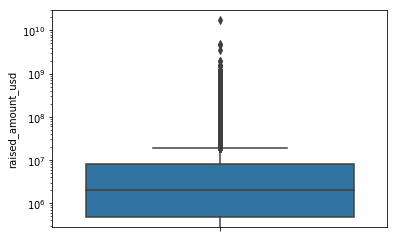

In [112]:
# distribution of raised_amount_usd
sns.boxplot(y=df['raised_amount_usd'])
plt.yscale('log')
plt.show()

<font color='483D8B'><b>Let's also look at the summary metrics.</font></b>

In [113]:
# summary metrics
df['raised_amount_usd'].describe()

count    7.512400e+04
mean     9.519475e+06
std      7.792778e+07
min      0.000000e+00
25%      4.705852e+05
50%      2.000000e+06
75%      8.000000e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

<font color='483D8B'><b>Note that there's a significant difference between the mean and the median - USD 9.5m and USD 2m. Let's also compare the summary stats across the four categories.</font></b>

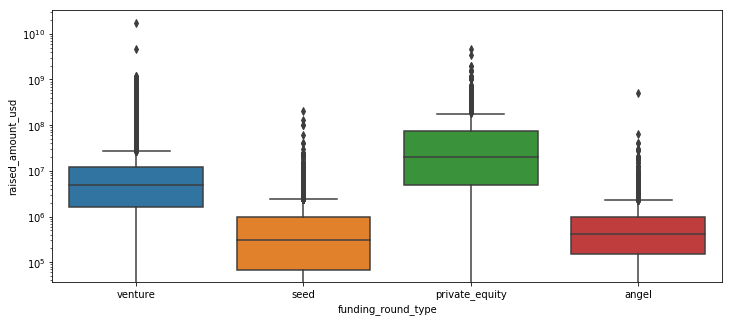

In [116]:
# comparing summary stats across four categories
plt.figure(figsize=(12,5))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=df)
plt.yscale('log')
plt.show()

In [117]:
# compare the mean and median values across categories
df.pivot_table(values='raised_amount_usd', columns='funding_round_type', aggfunc=[np.median, np.mean])

median                                      \
funding_round_type     angel private_equity      seed    venture   
raised_amount_usd   414906.0     20000000.0  300000.0  5000000.0   

                             mean                                              
funding_round_type          angel private_equity           seed       venture  
raised_amount_usd   971573.891136   7.393849e+07  747793.682484  1.172422e+07

<font color='483D8B'><b>Note that there's a large difference between the mean and the median values for all four types. For type venture, for e.g. the median is about 20m while the mean is about 70m. 

Thus, the choice of the summary statistic will drastically affect the decision (of the investment type). Let's choose median, since there are quite a few extreme values pulling the mean up towards them - but they are not the most 'representative' values.
</font></b>


In [118]:
# compare the median investment amount across the types
df.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               414906.0
seed                300000.0
Name: raised_amount_usd, dtype: float64

<font color='483D8B'><b>The median investment amount for type 'private_equity' is approx. USD 20m, which is beyond Spark Funds' range of 5-15m. The median of 'venture' type is about USD 5m, which is suitable for them. The average amounts of angel and seed types are lower than their range.

Thus, 'venture' type investment will be most suited to them.</font></b>

## Country Analysis

<font color='483D8B'><b>Let's now compare the total investment amounts across countries. Note that we'll filter the data for only the 'venture' type investments and then compare the 'total investment' across countries.</font></b>

In [119]:
# filter the df for private equity type investments
df = df[df.funding_round_type=="venture"]

# group by country codes and compare the total funding amounts
country_wise_total = df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
country_wise_total.head()

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
SWE    3.145857e+09
NLD    2.903876e+09
CHE    2.801560e+09
SGP    2.793918e+09
ESP    1.827622e+09
BRA    1.785818e+09
IRL    1.669286e+09
RUS    1.570426e+09
AUS    1.319029e+09
DNK    1.228311e+09
FIN    1.043200e+09
BEL    1.030840e+09
NOR    9.536361e+08
KOR    8.919883e+08
MYS    8.830588e+08
HKG    7.812670e+08
TWN    6.239795e+08
AUT    5.833607e+08
TUR    5.590975e+08
ITA    4.882894e+08
NZL    4.483164e+08
           ...     
KWT    1.400000e+07
LIE    1.309172e+07
MNE    1.220000e+07
SVN    1.201751e+07
BGR    1.130000e+07
KAZ    1.100000e+07
GRC    1.074378e+07
BAH    8.900000e+06
TTO    8.500000e+06
SVK    8.241062e+06
BGD    7.002000e+06
LBN    6.455000e+06
GGY    3.960000e+06
TUN    3.920000e+06
SEN    2.860000e+06
HRV    2.633669e+06
UGA    2.500000e+06
PER    2.469270e+06
BWA    

<font color='483D8B'><b>Let's now extract the top 9 countries from ```country_wise_total```.</font></b>

In [120]:
# top 9 countries
top_9_countries = country_wise_total[:9]
top_9_countries

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

<font color='483D8B'><b>Among the top 9 countries, USA, GBR and IND are the top three English speaking countries. Let's filter the dataframe so it contains only the top 3 countries.</font></b>

In [121]:
# filtering for the top three countries
df = df[(df.country_code=='USA') | (df.country_code=='GBR') | (df.country_code=='IND')]
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0
15,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0


<font color='483D8B'><b>After filtering for 'venture' investments and the three countries USA, Great Britain and India, the filtered df looks like this.</font></b>

In [122]:
# filtered df has about 38800 observations
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 88518
Data columns (total 9 columns):
permalink                  38803 non-null object
name                       38803 non-null object
category_list              38803 non-null object
status                     38803 non-null object
country_code               38803 non-null object
funding_round_permalink    38803 non-null object
funding_round_type         38803 non-null object
funded_at                  38803 non-null object
raised_amount_usd          38803 non-null float64
dtypes: float64(1), object(8)
memory usage: 3.0+ MB


<font color='483D8B'><b>One can visually analyse the distribution and the total values of funding amount.</font></b>

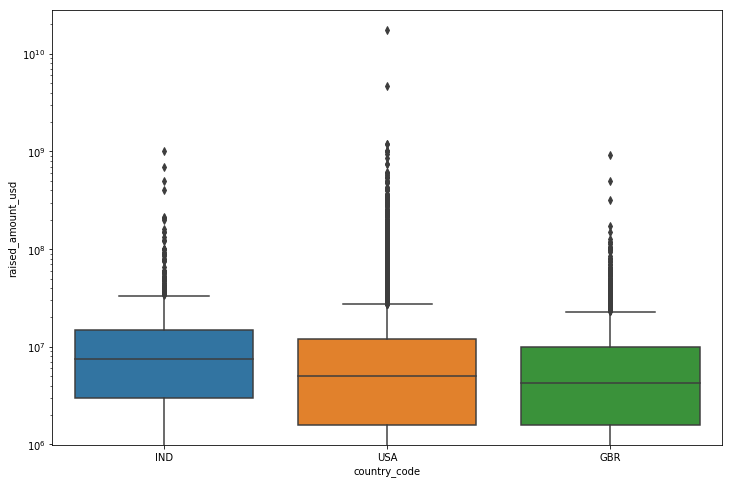

In [124]:
# boxplot to see distributions of funding amount across countries
plt.figure(figsize=(12, 8))
sns.boxplot(x='country_code', y='raised_amount_usd', data=df)
plt.yscale('log')
plt.show()

<font color='483D8B'><b>Now, we have shortlisted the investment type (venture) and the three countries. Let's now choose the sectors.</font></b>

## Sector Analysis

<font color='483D8B'><b>First, we need to extract the main sector using the column ```category_list```. The category_list column contains values such as 'Biotechnology|Health Care' - in this, 'Biotechnology' is the 'main category' of the company, which we need to use.

Let's extract the main categories in a new column.</font></b>

In [125]:
# extracting the main category
df.loc[:, 'main_category'] = df['category_list'].apply(lambda x: x.split("|")[0])
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
15,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps


<font color='483D8B'><b>We can now drop the ```category_list``` column.</font></b>

In [126]:
# drop the category_list column
df = df.drop('category_list', axis=1)
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
9,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
15,/organization/1-mainstream,1 Mainstream,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps


<font color='483D8B'><b>Now, we'll read the ```mapping.csv``` file and merge the main categories with its corresponding column.</font></b> 

In [127]:
# read mapping file
mapping = pd.read_csv("mapping.csv", sep=",")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


<font color='483D8B'><b>Firstly, let's get rid of the missing values since we'll not be able to merge those rows anyway.</font></b>

In [128]:
# missing values in mapping file
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [129]:
# remove the row with missing values
mapping = mapping[~pd.isnull(mapping['category_list'])]
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

<font color='483D8B'><b>Now, since we need to merge the mapping file with the main dataframe (df), let's convert the common column to lowercase in both.</font></b>

In [130]:
# converting common columns to lowercase
mapping['category_list'] = mapping['category_list'].str.lower()
df['main_category'] = df['main_category'].str.lower()

In [131]:
# look at heads
print(mapping.head())

      category_list  Automotive & Sports  Blanks  Cleantech / Semiconductors  \
1                3d                    0       0                           0   
2       3d printing                    0       0                           0   
3     3d technology                    0       0                           0   
4        accounting                    0       0                           0   
5  active lifestyle                    0       0                           0   

   Entertainment  Health  Manufacturing  News, Search and Messaging  Others  \
1              0       0              1                           0       0   
2              0       0              1                           0       0   
3              0       0              1                           0       0   
4              0       0              0                           0       0   
5              0       1              0                           0       0   

   Social, Finance, Analytics, Advertising  

In [132]:
print(df.head())

                     permalink          name     status country_code  \
0          /organization/-fame         #fame  operating          IND   
7         /organization/0xdata        H2O.ai  operating          USA   
8         /organization/0xdata        H2O.ai  operating          USA   
9         /organization/0xdata        H2O.ai  operating          USA   
15  /organization/1-mainstream  1 Mainstream   acquired          USA   

                            funding_round_permalink funding_round_type  \
0   /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
7   /funding-round/3bb2ee4a2d89251a10aaa735b1180e44            venture   
8   /funding-round/ae2a174c06517c2394aed45006322a7e            venture   
9   /funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e            venture   
15  /funding-round/b952cbaf401f310927430c97b68162ea            venture   

     funded_at  raised_amount_usd main_category  
0   05-01-2015         10000000.0         media  
7   09-11-2015        

<font color='483D8B'><b>Let's have a look at the ```category_list``` column of the mapping file. These values will be used to merge with the main df.</font></b>

In [133]:
mapping['category_list']

1                                      3d
2                             3d printing
3                           3d technology
4                              accounting
5                        active lifestyle
6                            ad targeting
7                      advanced materials
8                        adventure travel
9                             advertising
10                  advertising exchanges
11                   advertising networks
12                  advertising platforms
13                                 advice
14                              aerospace
15                            agriculture
16                  air pollution control
17                             algorithms
18                            all markets
19                           all students
20                    alter0tive medicine
21                                 alumni
22                               a0lytics
23                                android
24                                

<font color='483D8B'><b>To be able to merge all the ```main_category``` values with the mapping file's ```category_list``` column, all the values in the  ```main_category``` column should be present in the ```category_list``` column of the mapping file.

Let's see if this is true.</font></b>

In [134]:
# values in main_category column in df which are not in the category_list column in mapping file
df[~df['main_category'].isin(mapping['category_list'])]

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,analytics
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,analytics
9,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,analytics
47,/organization/100plus,100Plus,acquired,USA,/funding-round/b5facb0d9dea2f0352b5834892c88c53,venture,02-11-2011,500000.0,analytics
136,/organization/1world-online,1World Online,operating,USA,/funding-round/32936e588a134502712877150198a0b3,venture,13-08-2015,2500000.0,analytics
137,/organization/1world-online,1World Online,operating,USA,/funding-round/4e30bd5c85d8163239a3479ec979647a,venture,01-12-2013,500000.0,analytics
138,/organization/1world-online,1World Online,operating,USA,/funding-round/a349bfd7a8d48cfc8b9fdb79480dea7f,venture,02-07-2013,1000000.0,analytics
187,/organization/24-7-card,24/7 Card,closed,USA,/funding-round/0c38194ff2035185c96155dfad18f3bd,venture,21-12-2011,3452941.0,finance
590,/organization/6th-wave-innovations-corporation,6th Wave Innovations Corporation,operating,USA,/funding-round/75d128ac40f9e541a1a11786a47c2952,venture,08-07-2015,2569720.0,nanotechnology
597,/organization/7-billion-people,7 Billion People,closed,USA,/funding-round/58959ed2be7b14abd6beeb20c9eb17ca,venture,13-07-2012,2368902.0,analytics


<font color='483D8B'><b>Notice that values such as 'analytics', 'business analytics', 'finance', 'nanatechnology' etc. are not present in the mapping file.

Let's have a look at the values which are present in the mapping file but not in the main dataframe df.</font></b>

In [135]:
# values in the category_list column which are not in main_category column 
mapping[~mapping['category_list'].isin(df['main_category'])]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,air pollution control,0,0,1,0,0,0,0,0,0
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
33,aquaculture,0,0,1,0,0,0,0,0,0
49,b2b express delivery,0,0,0,0,0,0,0,0,1
59,big data a0lytics,0,0,0,0,0,0,0,0,1
64,biomass power generation,0,0,1,0,0,0,0,0,0
69,boating industry,1,0,0,0,0,0,0,0,0
77,building owners,0,0,0,0,0,0,1,0,0
79,business a0lytics,0,0,0,0,0,0,0,0,1


<font color='483D8B'><b>If you see carefully, you'll notice something fishy - there are sectors named *alter0tive medicine*, *a0lytics*, *waste ma0gement*, *veteri0ry*, etc. This is not a *random* quality issue, but rather a pattern. In some strings, the 'na' has been replaced by '0'. This is weird - maybe someone was trying to replace the 'NA' values with '0', and ended up doing this. 

Let's treat this problem by replacing '0' with 'na' in the ```category_list``` column.</font></b>

In [136]:
# replacing '0' with 'na'
mapping['category_list'] = mapping['category_list'].apply(lambda x: x.replace('0', 'na'))
print(mapping['category_list'])

1                                      3d
2                             3d printing
3                           3d technology
4                              accounting
5                        active lifestyle
6                            ad targeting
7                      advanced materials
8                        adventure travel
9                             advertising
10                  advertising exchanges
11                   advertising networks
12                  advertising platforms
13                                 advice
14                              aerospace
15                            agriculture
16                  air pollution control
17                             algorithms
18                            all markets
19                           all students
20                   alternative medicine
21                                 alumni
22                              analytics
23                                android
24                                

<font color='483D8B'><b>This looks fine now. Let's now merge the two dataframes.</font></b>

In [137]:
# merge the dfs
df = pd.merge(df, mapping, how='inner', left_on='main_category', right_on='category_list')
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,media,0,0,0,1,0,0,0,0,0


In [138]:
# let's drop the category_list column since it is the same as main_category
df = df.drop('category_list', axis=1)
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,0,0,0,1,0,0,0,0,0


In [139]:
# look at the column types and names
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 38787
Data columns (total 18 columns):
permalink                                  38788 non-null object
name                                       38788 non-null object
status                                     38788 non-null object
country_code                               38788 non-null object
funding_round_permalink                    38788 non-null object
funding_round_type                         38788 non-null object
funded_at                                  38788 non-null object
raised_amount_usd                          38788 non-null float64
main_category                              38788 non-null object
Automotive & Sports                        38788 non-null int64
Blanks                                     38788 non-null int64
Cleantech / Semiconductors                 38788 non-null int64
Entertainment                              38788 non-null int64
Health                                     38788 

### Converting the 'wide' dataframe to 'long'

<font color='483D8B'><b>You'll notice that the columns representing the main category in the mapping file are originally in the 'wide' format - Automotive & Sports, Cleantech / Semiconductors etc.

They contain the value '1' if the company belongs to that category, else 0. This is quite redundant. We can as well have a column named 'sub-category' having these values. 

Let's convert the df into the long format from the current wide format. First, we'll store the 'value variables' (those which are to be melted) in an array. The rest will then be the 'index variables'.</font></b>

In [141]:
# store the value and id variables in two separate arrays

# store the value variables in one Series
value_vars = df.columns[9:18]

# take the setdiff() to get the rest of the variables
id_vars = np.setdiff1d(df.columns, value_vars)

print(value_vars, "\n")
print(id_vars)

Index(['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object') 

['country_code' 'funded_at' 'funding_round_permalink' 'funding_round_type'
 'main_category' 'name' 'permalink' 'raised_amount_usd' 'status']


In [142]:
# convert into long
long_df = pd.melt(df, 
        id_vars=list(id_vars), 
        value_vars=list(value_vars))

long_df.head()

,country_code,funded_at,funding_round_permalink,funding_round_type,main_category,name,permalink,raised_amount_usd,status,variable,value
0,IND,05-01-2015,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,media,#fame,/organization/-fame,10000000.0,operating,Automotive & Sports,0
1,GBR,06-10-2015,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,media,90min,/organization/90min,15000000.0,operating,Automotive & Sports,0
2,GBR,07-05-2013,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,media,90min,/organization/90min,5800000.0,operating,Automotive & Sports,0
3,GBR,26-03-2014,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,media,90min,/organization/90min,18000000.0,operating,Automotive & Sports,0
4,USA,06-08-2014,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,media,All Def Digital,/organization/all-def-digital,5000000.0,operating,Automotive & Sports,0


<font color='483D8B'><b>We can now get rid of the rows where the column 'value' is 0 and then remove that column altogether.</font></b>

In [143]:
# remove rows having value=0
long_df = long_df[long_df['value']==1]
long_df = long_df.drop('value', axis=1)

In [144]:
# look at the new df
long_df.head()
len(long_df)

38788

In [145]:
# renaming the 'variable' column
long_df = long_df.rename(columns={'variable': 'sector'})

In [146]:
# info
long_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 25828 to 349075
Data columns (total 10 columns):
country_code               38788 non-null object
funded_at                  38788 non-null object
funding_round_permalink    38788 non-null object
funding_round_type         38788 non-null object
main_category              38788 non-null object
name                       38788 non-null object
permalink                  38788 non-null object
raised_amount_usd          38788 non-null float64
status                     38788 non-null object
sector                     38788 non-null object
dtypes: float64(1), object(9)
memory usage: 3.3+ MB


<font color='483D8B'><b>The dataframe now contains only venture type investments in countries USA, IND and GBR, and we have mapped each company to one of the eight main sectors (named 'sector' in the dataframe). 

We can now compute the sector-wise number and the amount of investment in the three countries.</font></b>

In [147]:
# summarising the sector-wise number and sum of venture investments across three countries

# first, let's also filter for investment range between 5 and 15m
df = long_df[(long_df['raised_amount_usd'] >= 5000000) & (long_df['raised_amount_usd'] <= 15000000)]


In [148]:
# groupby country, sector and compute the count and sum
df.groupby(['country_code', 'sector']).raised_amount_usd.agg(['count', 'sum'])

count           sum
country_code sector                                                      
GBR          Automotive & Sports                         16  1.670516e+08
             Cleantech / Semiconductors                 130  1.163990e+09
             Entertainment                               56  4.827847e+08
             Health                                      24  2.145375e+08
             Manufacturing                               42  3.619403e+08
             News, Search and Messaging                  73  6.157462e+08
             Others                                     147  1.283624e+09
             Social, Finance, Analytics, Advertising    133  1.089404e+09
IND          Automotive & Sports                         13  1.369000e+08
             Cleantech / Semiconductors                  20  1.653800e+08
             Entertainment                               33  2.808300e+08
             Health                                      19  1.677400e+08
             Manufacturing                               21  2.009000e+08
             News, Search and Messaging                  52  4.338345e+08
             Others                                     110  1.013410e+09
             Social, Finance, Analytics, Advertising     60  5.505496e+08
USA          Automotive & Sports                        167  1.454104e+09
             Cleantech / Semiconductors                2350  2.163343e+10
             Entertainment                              591  5.099198e+09
             Health                                     909  8.211859e+09
             Manufacturing                              799  7.258553e+09
             News, Search and Messaging                1583  1.397157e+10
             Others                                    2950  2.632101e+10
             Social, Finance, Analytics, Advertising   2714  2.380738e+10

This will be much more easy to understand using a plot.

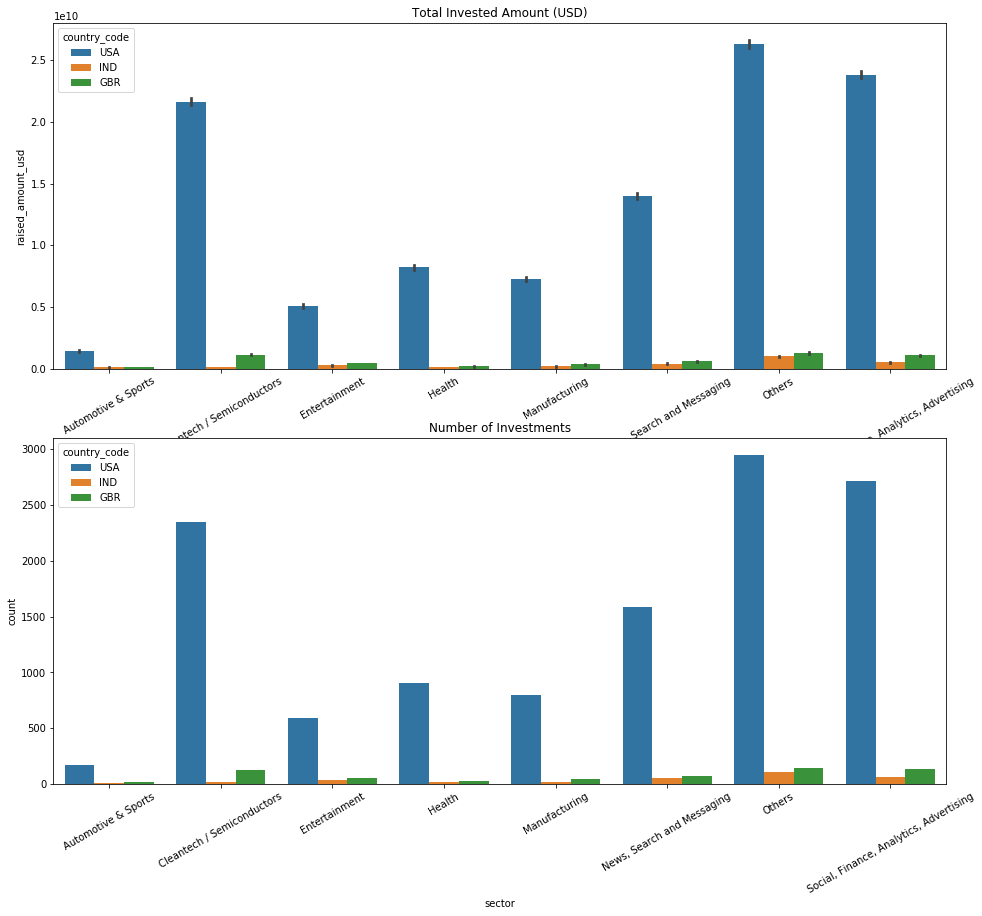

In [149]:
# plotting sector-wise count and sum of investments in the three countries
plt.figure(figsize=(16, 14))

plt.subplot(2, 1, 1)
p = sns.barplot(x='sector', y='raised_amount_usd', hue='country_code', data=df, estimator=np.sum)
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.title('Total Invested Amount (USD)')

plt.subplot(2, 1, 2)
q = sns.countplot(x='sector', hue='country_code', data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Number of Investments')


plt.show()

<font color='483D8B'><b>Thus, the top country in terms of the number of investments (and the total amount invested) is the USA. The sectors 'Others', 'Social, Finance, Analytics and Advertising' and 'Cleantech/Semiconductors' are the most heavily invested ones.

In case you don't want to consider 'Others' as a sector, 'News, Search and Messaging' is the next best sector.</font></b>